# Statistical Tests in Machine Learning: A Comprehensive Guide

Statistical tests are fundamental in machine learning for validating assumptions, selecting relevant features, and ensuring the reliability of predictive models. They help us understand the relationships between variables, assess the significance of these relationships, and make informed decisions about which variables to include or exclude from a model. This guide provides an overview of key statistical techniques for analyzing both dependent (target) and independent (predictor) variables.

###  When Are Statistical Tests Necessary?

The need for statistical tests depends on the type of model being used and the underlying assumptions of that model. For example:

- Linear Models: These models often assume linear relationships between variables, normality of residuals, and homoscedasticity (equal variance). 
- Tree-Based Models: These models are less sensitive to assumptions like linearity and normality, but statistical tests can still help in feature selection and understanding variable importance.
- Neural Networks: While neural networks can model complex, nonlinear relationships, statistical tests can aid in feature selection and detecting multicollinearity.
- k-Nearest Neighbors (kNN): Statistical tests can help identify relevant features and assess the significance of relationships between variables.

In general, statistical tests are necessary when:
- You need to validate assumptions about the data (e.g., normality, homoscedasticity).
- You want to assess the significance of relationships between variables.
- You need to select or eliminate features to improve model performance.
- You want to detect multicollinearity or other issues that could harm model performance. High correlation between independent variables can harm model performance, especially in regression models. 


### Statistical Techniques for dependent Variables:
When analyzing the dependent variable (target), the goal is to understand its relationship with the independent variables and assess whether differences across groups are statistically significant.


##### General Guidelines for Variable Selection:
Before removing a variable, ensure that nonlinear relationships are explored, and the variable is retained if it makes business sense or is critical for the model's context.

- p-value > 0.05: Consider dropping the variable unless business logic suggests its importance or if it has interaction effects with other variables. However, be cautious of multicollinearity; if present, one of the correlated variables should be removed.
- p-value ≈ 0.05: Further investigation is required. Check for nonlinear relationships using techniques like polynomial regression or transformations. Retain the variable if it aligns with business objectives or model requirements.
- Test the Variable: Evaluate the variable's impact on model performance by testing it within the model. If it does not improve predictive accuracy, consider removing it.


### Statistical Techniques for Independent Variables 
For independent variables (predictors), the focus is on detecting multicollinearity (high correlation between predictors), selecting relevant features, and removing redundant or noisy variables.


In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Possible prerequisites
Parametric assumptions:  normal distribution and has equal variances across groups.

## Test for Normality
Essential for parametric methods, these tests verify if data follows a normal distribution.

#### Shapiro-Wilk Test
For small datasets n < 2000. 

H₀(Null Hypothesis) data is normally distributed so if p > 0.05: Normal distribution

In [5]:
# Select the 'fare' column and drop NaN values
fare_data = titanic['fare'].dropna()

# Perform Shapiro-Wilk normality test
stat, p_value = stats.shapiro(fare_data)

# Print the test statistic and p-value
print(f'Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Fail to reject H0: The 'Fare' variable appears to be normally distributed.")
else:
    print("Reject H0: The 'Fare' variable does NOT appear to be normally distributed.")


Shapiro-Wilk Test Statistic: 0.5219, p-value: 1.0840444395829968e-43
Reject H0: The 'Fare' variable does NOT appear to be normally distributed.


#### D'Agostino-Pearson Test
Evaluates whether a dataset is normally distributed by checking both skewness (measures the asymmetry of the distribution)  and kurtosis (measures whether the tails are heavier or lighter than a normal distribution), better for larger examples

In [7]:
# Select the 'fare' column and drop NaN values
fare_data = titanic['fare'].dropna()

# Perform D'Agostino-Pearson normality test
stat, p_value = stats.normaltest(fare_data)

# Print the test statistic and p-value
print(f"D'Agostino-Pearson Test Statistic: {stat:.4f}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Fail to reject H0: The 'Fare' variable appears to be normally distributed.")
else:
    print("Reject H0: The 'Fare' variable does NOT appear to be normally distributed.")

D'Agostino-Pearson Test Statistic: 904.5873, p-value: 3.727091062842147e-197
Reject H0: The 'Fare' variable does NOT appear to be normally distributed.


## Tests for Homogeneity of Variance  (homoscedasticity)
Verify if groups have equal variances which is an assumption for many parametric tests like ANOVA and t-tests.

#### Levene's Test

 More robust when data is not normally distributed, so actually its preferred for general use due to robustness.

In [4]:
# Select relevant columns and drop NaN values
titanic = titanic[['pclass', 'fare']].dropna()

# Split fare data into groups based on passenger class
fare_class1 = titanic[titanic['pclass'] == 1]['fare']
fare_class2 = titanic[titanic['pclass'] == 2]['fare']
fare_class3 = titanic[titanic['pclass'] == 3]['fare']

# Perform Levene’s test
stat, p_value = stats.levene(fare_class1, fare_class2, fare_class3)

# Print results
print(f"Levene's Test Statistic: {stat:.4f}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Fail to reject H0: The variances across passenger classes are equal (homoscedasticity).")
else:
    print("Reject H0: The variances are significantly different (heteroscedasticity).")

Levene's Test Statistic: 118.5702, p-value: 2.288618662046418e-46
Reject H0: The variances are significantly different (heteroscedasticity).


#### Bartlett's Test

More powerful but requires normality

In [8]:
# Select relevant columns and drop NaN values
titanic = titanic[['pclass', 'fare']].dropna()

#test requires normality, we will first normalize the Fare data using a logarithmic transformation.
#The Fare variable is highly skewed, which violates Bartlett’s assumption of normality.Applying log1p() (log(1 + fare)) reduces skewness, making the data more normally distributed
# Apply a logarithmic transformation to make the distribution more normal
titanic['fare_log'] = np.log1p(titanic['fare'])  # log(1 + fare) to avoid log(0) issues

# Split transformed fare data into groups based on passenger class
fare_class1 = titanic[titanic['pclass'] == 1]['fare_log']
fare_class2 = titanic[titanic['pclass'] == 2]['fare_log']
fare_class3 = titanic[titanic['pclass'] == 3]['fare_log']

# Perform Bartlett’s test
stat, p_value = stats.bartlett(fare_class1, fare_class2, fare_class3)

# Print results
print(f"Bartlett's Test Statistic: {stat:.4f}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Fail to reject H0: The variances across passenger classes are equal (homoscedasticity).")
else:
    print("Reject H0: The variances are significantly different (heteroscedasticity).")

Bartlett's Test Statistic: 78.9749, p-value: 7.092678261738603e-18
Reject H0: The variances are significantly different (heteroscedasticity).


# Statistical Techniques for dependent variable

### Correlation  (Continuous Target with Continuous Features)

Correlation measures the strength and direction of the relationship between the target variable and independent variables. It is used to check linear dependencies.

##### Prerequisites: 
- Linearity: Examine scatterplots to confirm linear relationships between variables
- No outliers:  Utilize box plots, z-scores, or Isolation Forest algorithms to identify and address outliers that may distort correlation coefficients


##### Interpretation Framework

1) Strength of Correlation (magnitude of r) tells us how strongly two variables are linearly related:

- Strong correlation (|r| > 0.5) → The variable is likely useful for prediction, independent variable is strongly correlated with the target
- Weak correlation (|r| < 0.3) → Limited predictive utility, but may still be considered.
- Negligible correlation (|r| < 0.1) → Variable unlikely to provide predictive value. 



2) Statistical Significance (p-value) tells us whether the correlation is likely due to chance.We need to know it does not mean it is statistically significant.

 Even if r is high (>0.5), if p > 0.05, the correlation is not reliable and may be due to random chance , if p < 0.05 the correlation has 95% confidence level.


#### Pearson
Is parametric. Measures the linear relationship between two continuous variables.
Requirements: Linear relationship, normal distribution and minimal outliers

Pearson Correlation: 0.0961, p-value: 0.0102

Interpretation:
Significant correlation detected (linear relationship).
The feature has a weak correlation with the target.


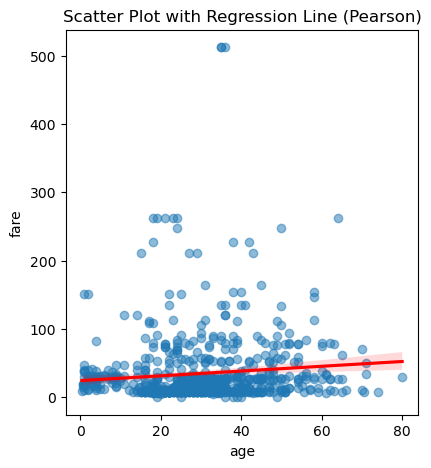

In [24]:
# Select relevant columns and drop NaN values
titanic = titanic[['age', 'fare']].dropna()

# Pearson Correlation (Linear Relationship)
pearson_corr, pearson_p = stats.pearsonr(titanic['age'], titanic['fare'])


# Print Results
print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

# Interpretation
alpha = 0.05
print("\nInterpretation:")


if pearson_p < alpha:
    print("Significant correlation detected (linear relationship).")
else:
    print("No significant correlation detected.")

# Strength Analysis
if abs(pearson_corr) > 0.5:
    print("The feature has a strong correlation with the target.")
else:
    print("The feature has a weak correlation with the target.")

# Visualization
plt.figure(figsize=(10, 5))

# Scatter plot with regression line
plt.subplot(1, 2, 1)
sns.regplot(x=titanic['age'], y=titanic['fare'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Scatter Plot with Regression Line (Pearson)")


plt.show()

#### Spearman
Non parametric test.
Assesses Monotonic relationship (increasing/decreasing trend, not necessarily linear) and  ordinal data ( have a meaningful order ).
Is more robust to outliers and skewed data, so no need normally distribution.

Spearman Correlation: 0.1351, p-value: 0.0003

Interpretation:
Significant monotonic correlation detected.
The feature has a weak correlation with the target.


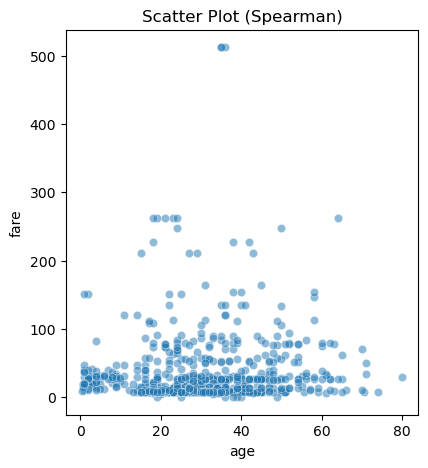

In [25]:
# Select relevant columns and drop NaN values
titanic = titanic[['age', 'fare']].dropna()

# Spearman Correlation (Monotonic Relationship)
spearman_corr, spearman_p = stats.spearmanr(titanic['age'], titanic['fare'])

# Print Results
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if spearman_p < alpha:
    print("Significant monotonic correlation detected.")
else:
    print("No significant monotonic correlation detected.")

if abs(spearman_corr) > 0.5:
    print("The feature has a strong correlation with the target.")
else:
    print("The feature has a weak correlation with the target.")

# Visualization
plt.figure(figsize=(10, 5))


# Scatter plot without regression line (monotonic trend)
plt.subplot(1, 2, 2)
sns.scatterplot(x=titanic['age'], y=titanic['fare'], alpha=0.5)
plt.title("Scatter Plot (Spearman)")

plt.show()

### Group Comparison Tests (Continuous Target with Categorical Features)

#### Parametric Test
Parametric assumptions:  normal distribution and has equal variances across groups.

##### Independent T-test
Used to compare the means of two independent groups.The target variable is continuous and the independent variable is binary (e.g., male vs female).

In [19]:
# Select relevant columns and drop NaN values
titanic = titanic[['survived', 'fare']].dropna()

# Split fare data into two groups: Survived (1) vs. Not Survived (0)
fare_survived = titanic[titanic['survived'] == 1]['fare']
fare_not_survived = titanic[titanic['survived'] == 0]['fare']

# Perform Independent t-Test
stat, p_value = stats.ttest_ind(fare_survived, fare_not_survived, equal_var=False)  # Welch's t-test

# Print results
print(f"Independent t-Test Statistic: {stat:.4f}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Fail to reject H0: No significant difference in mean fares.Before removing check for nonlinear relationships (use polynomial regression or transformations)")
else:
    print("Reject H0: Significant difference in mean fares.You should consider using this variable in the model.")

Independent t-Test Statistic: 6.8391, p-value: 2.6993323503141236e-11
Reject H0: Significant difference in mean fares.


##### One-way ANOVA
Used to compare the means of 3 or more independent groups, so it helps to test if a categorical variable significantly affects the target

In [23]:
# Split fare data into groups based on passenger class
fare_class1 = titanic[titanic['pclass'] == 1]['fare']
fare_class2 = titanic[titanic['pclass'] == 2]['fare']
fare_class3 = titanic[titanic['pclass'] == 3]['fare']

# Perform One-Way ANOVA
stat, p_value = stats.f_oneway(fare_class1, fare_class2, fare_class3)

# Print results
print(f"One-Way ANOVA Statistic: {stat:.4f}, p-value: {p_value}")

# Interpretation
if p_value > alpha:
    print("Fail to reject H0: No significant difference in mean fares among passenger classes.")
else:
    print("Reject H0: At least one passenger class has a significantly different mean fare.You should consider using this variable in the model.You need to perform a post-hoc test (like Tukey’s HSD) to identify which groups are different.")


One-Way ANOVA Statistic: 242.3442, p-value: 1.0313763209141171e-84
Reject H0: At least one passenger class has a significantly different mean fare.


#### Non-parametric Tests
When parametric assumptions are violated

##### Mann-Whitney U Test
Its used when the dependent variable is continuous or ordinal and the independent variable is binary.

The Mann-Whitney U test (also known as the Wilcoxon rank-sum test) is a powerful non-parametric alternative to the independent t-test when parametric assumptions are violated. It evaluates whether two independent samples come from the same distribution without requiring normally distributed data.Don't use the test with matched pairs.

While the Mann-Whitney U test identifies significant differences between distributions, it doesn't quantify the magnitude of these differences. For effect size measurement, complementary metrics are necessary like Cliff’s Delta and Rank-Biserial

In [25]:
# Select relevant columns and drop NaN values
titanic = titanic[['sex', 'fare']].dropna()

# Split fare data into groups based on gender
fare_male = titanic[titanic['sex'] == 'male']['fare']
fare_female = titanic[titanic['sex'] == 'female']['fare']

# Perform Mann-Whitney U Test
stat, p_value = stats.mannwhitneyu(fare_male, fare_female, alternative='two-sided')

# Print results
print(f"Mann-Whitney U Test Statistic: {stat:.4f}, p-value: {p_value}")

# Interpretation
if p_value > alpha:
    print("Fail to reject H0: No significant difference in fare distributions between genders.The variable is likely not useful for predicting the target.")
else:
    print("Reject H0: Significant difference in fare distributions between genders.Keep the variable")


Mann-Whitney U Test Statistic: 62175.0000, p-value: 9.612326962909258e-15
Reject H0: Significant difference in fare distributions between genders.


##### Kruskal-Wallis H-test
It is used when for 3+ categories, to test if a categorical variable significantly affects the target.
Alternative to one-way ANOVA,compare three or more independent group.Since Kruskal-Wallis only tells us that there is a difference, we need to determine where the difference is : we use Dunn’s Test

In [27]:
# Perform Kruskal-Wallis H Test
stat, p_value = stats.kruskal(fare_class1, fare_class2, fare_class3)

# Print results
print(f"Kruskal-Wallis H Test Statistic: {stat:.4f}, p-value: {p_value}")

# Interpretation
if p_value > alpha:
    print("Fail to reject H0: No significant difference in fare distributions among passenger classes.The variable is likely not useful for predicting the target.")
else:
    print("Reject H0: Significant difference in fare distributions among passenger classes. Likely useful for prediction.")


Kruskal-Wallis H Test Statistic: 438.0437, p-value: 7.586096900646798e-96
Reject H0: Significant difference in fare distributions among passenger classes.


### Association Tests (Categorical Target with Categorical Features)
This are Non-parametric tests: When parametric assumptions are violated

#### Chi-Square Tests
Used to analyze relationships between categorical variables. There are two common types:

1️)Chi-Square Test for Independence – Checks whether two categorical variables are independent or related. You can Check Effect Size (Cramér’s V)

2️)Chi-Square Goodness-of-Fit Test – Checks whether a sample distribution matches an expected distribution.

Expected frequencies ≥ 5 in at least 80% of cases,  if not use Fisher’s Exact Test. The expected value in a contingency table represents the number of observations we would expect in each cell if there were no relationship between the two variables (i.e., under the null hypothesis)

In [17]:
# Case 1)

import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(titanic['pclass'], titanic['survived'])
print("Observed Contingency Table:\n", contingency_table)

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print Results
print("Chi-Square Test for Independence")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Fail to reject H0: Survival is independent of Passenger Class.Feature may not be useful")
else:
    print("Reject H0: Survival is dependent on Passenger Class.Feature is statistically associated with the target.")


Observed Contingency Table:
 survived    0    1
pclass            
1          80  136
2          97   87
3         372  119
Chi-Square Test for Independence
Chi-Square Statistic: 102.8890
Degrees of Freedom: 2
P-value: 4.549251711298793e-23
Reject H0: Survival is dependent on Passenger Class.


In [31]:
# Case 2)
from scipy.stats import chisquare

# Count passengers in each class
observed_counts = titanic['pclass'].value_counts().sort_index()

# Assume we expect an equal number of passengers in each class
expected_counts = [len(titanic) / 3] * 3  # Equal distribution assumption

# Perform Chi-Square Goodness-of-Fit Test
chi2, p_value = chisquare(observed_counts, expected_counts)

# Print Results
print("\nChi-Square Goodness-of-Fit Test")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value}")

# Interpretation
if p_value > alpha:
    print("Fail to reject H0: The class distribution matches the expected uniform distribution.")
else:
    print("Reject H0: The class distribution does not match the expected uniform distribution.")



Chi-Square Goodness-of-Fit Test
Chi-Square Statistic: 191.8047
P-value: 2.239420223102885e-42
Reject H0: The class distribution does not match the expected uniform distribution.


#### Fisher’s Exact Test
Used to analyze relationships between categorical variables.Use more in small samples.Preferred when Chi-Square assumptions are violated

In [16]:
# Select relevant columns (Survived and Sex)
df = titanic[['survived', 'sex']]

# Convert categorical variables to numerical
df.loc[:, 'survived'] = df['survived'].astype(object)
df.loc[:, 'sex'] = df['sex'].astype(object)
df.loc[:, 'survived']= df['survived'].map({0: 'No', 1: 'Yes'})
df.loc[:, 'sex']= df['sex'].map({'male': 'Male', 'female': 'Female'})


# Create contingency table
contingency_table = pd.crosstab(df['sex'], df['survived'])
print("Contingency Table:\n", contingency_table)

# Perform Fisher's Exact Test
odds_ratio, p_value = stats.fisher_exact(contingency_table)

# Display results
print("\nFisher's Exact Test Results:")
print(f"Odds Ratio: {odds_ratio:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Conclusion: There is a significant association between gender and survival (Reject H0).")
else:
    print("Conclusion: No significant association found (Fail to reject H0).")



Contingency Table:
 survived   No  Yes
sex               
Female     81  233
Male      468  109

Fisher's Exact Test Results:
Odds Ratio: 0.0810
P-value: 0.000000
Conclusion: There is a significant association between gender and survival (Reject H0).


/var/folders/x_/gjdjch3n18b_znsmwt0_wm2w0000gn/T/ipykernel_1876/2813530288.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 

### Information-Based Tests (Categorical Target with Any Feature Type)
This are Non-parametric Tests: When parametric assumptions are violated

#### Mutual Information
Mutual Information (MI) represents a robust information-theoretic measure that quantifies the statistical dependency between variables. Unlike correlation coefficients that primarily detect linear relationships, MI effectively captures both linear and non-linear dependencies.It tells us how much knowing one variable reduces the uncertainty of another.

Works for both categorical and continuous variables without assumption constraints, captures non-linear and lineal relationships and scale its irrelevant.

Interpretation:
- MI = 0 → No relationship between variables.
- Higher MI Score (closer to 1): Strong dependency, indicating the feature contains substantial information about the target variable

Requirements:
- Handle missing values (imputation or removal).
- Encode categorical variables appropriately
- Consider discretization for continuous variables when necessary.
- May require optimization techniques for high-dimensional datasets








/var/folders/x_/gjdjch3n18b_znsmwt0_wm2w0000gn/T/ipykernel_1876/2992902499.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].fillna('Unknown')
/var/folders/x_/gjdjch3n18b_znsmwt0_wm2w0000gn/T/ipykernel_1876/2992902499.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_results, palette='viridis')


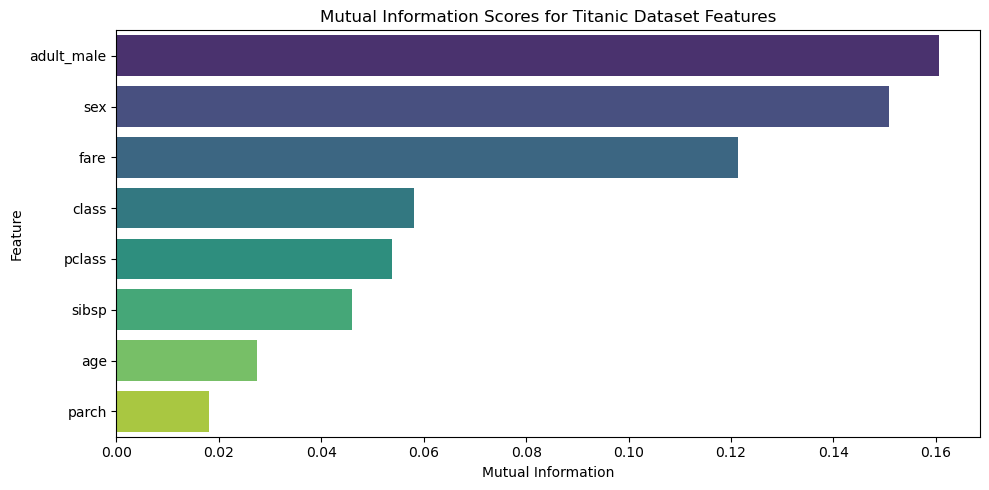


Mutual Information Scores:
      Feature  Mutual Information
7  adult_male            0.160577
1         sex            0.150870
5        fare            0.121446
6       class            0.058107
0      pclass            0.053849
3       sibsp            0.046024
2         age            0.027444
4       parch            0.018096


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')
# Load Titanic dataset
df = sns.load_dataset('titanic')
# Drop columns that are not useful for modeling
df = df.drop(columns=['deck', 'embark_town', 'alive', "alone", "who","embarked"])

#Handle missing values for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with 'Unknown'
categorical_cols = df.select_dtypes(include=['object',"category","bool"]).columns.astype('object')
# Convert categorical columns to object type (if not already object)
df[categorical_cols] = df[categorical_cols].astype('object')

# Fill missing categorical values with 'Unknown'
df[categorical_cols] = df[categorical_cols].fillna('Unknown')


# Create a copy of the dataframe for feature selection
X = df.drop(columns=['survived'])
y = df['survived']

# Convert categorical variables to numeric using Label Encoding
X_encoded = X.copy()
le = LabelEncoder()
for col in categorical_cols:
    if col in X_encoded.columns:  # Only encode if column exists in X
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# Create array indicating which features are discrete
discrete_features = [True if col in categorical_cols else False for col in X_encoded.columns]

# Compute Mutual Information
mi_scores = mutual_info_classif(X_encoded, y, discrete_features=discrete_features)

# Store results in a DataFrame
mi_results = pd.DataFrame({'Feature': X_encoded.columns, 'Mutual Information': mi_scores})
mi_results = mi_results.sort_values(by='Mutual Information', ascending=False)

# Display results
plt.figure(figsize=(10, 5))
sns.barplot(x='Mutual Information', y='Feature', data=mi_results, palette='viridis')
plt.title('Mutual Information Scores for Titanic Dataset Features')
plt.tight_layout()
plt.show()

print("\nMutual Information Scores:")
print(mi_results)


# Statistical Techniques for independent variables

### Collinearity Analysis
High collinearity harms regression models and some other machine learning models. It occurs when two or more independent variables are highly correlated, meaning they provide redundant information.

 Mitigating Multicollinearity:
- Drop one of the correlated variables manually (preferably the one with lower importance, low variance or completeness).
- Dimensionality Reduction: Use PCA to transform features into uncorrelated components.
- Regularization Techniques: Lasso Regression L1 to penalize collinearity (performs feature selection by forcing some coefficients to exactly zero),Ridge Regression R2 (Retains all variables but reduces their impact) and Elastic Net (combines L1 and L2 penalties, so balances feature selection and coefficient shrinkage).

#### VIF

Detects high correlation between independent variables (multicollinearity).Its focus is more for regresion models but also use it when collinearity can affect the performance of the model.

Interpretation:
- VIF > 10 → Strong multicollinearity → Remove the variable.
- VIF between 5-10 → Moderate collinearity → Consider removing or transforming the variable.
- VIF < 5 → No severe collinearity → Safe to keep.

If VIF is high for multiple features → Use PCA or feature engineering to reduce dimensionality. Numerical variables (categorical features need encoding first) 

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

 #Select relevant features
df = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex', 'embarked']]

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
df['sex'] = label_enc.fit_transform(df['sex'])  # Male=1, Female=0
df['embarked'] = label_enc.fit_transform(df['embarked'])  # Convert C, Q, S to numbers
# Compute VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Display VIF results
print(vif_data)

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

NameError: name 'titanic' is not defined

#### Correlation Matrix Analysis
Use techniques as pearson but in this case instead of leaving the variable if has lineal relationship , think of might removing one (|r| > 0.5)  more if > 0.8

While simpler than VIF, correlation matrices provide valuable visual insights into pairwise relationships.

#### Chi Square
Understanding relationships between 2 categorical predictors, this means there is or not a statistically significant association between the two variables. 
If independent (p > 0.05): Keep both variables (they provide separate information), if not use Cramér’s V or Phi Coefficient to measure the strength of the association between the two variables.